# Figure S8: Run duration variability model parameters across action costs.

## setup and imports

In [1]:
import fnmatch
import matplotlib.pyplot as plt

import numpy as np
import glob

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [2]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


In [3]:
rat_markers = {}
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            'RatM53', 'RatM54']

m, f = 0, 0
male_palette = create_teal_palette(num_shades=len([x for x in animalList if 'M' in x]))
female_palette = create_blue_violet_palette(num_shades=len([x for x in animalList if 'F' in x]), start_intensity=80)

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[female_palette[f], 'o', '-']
        f += 1
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[male_palette[m], 'o', '-']
        m += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32
Loading data for RatF42
Loading data for RatM40
Loading data for RatM43
Loading data for RatM53
Loading data for RatM54


# S8A Effect of platform distance on $σ_0$, $σ_t$, and $σ_u$

$\sigma_0$: p_s=0.212, p_i=0.000, obs_slope=0.006, obs_intercept=0.083
$\sigma_t$: p_s=0.993, p_i=0.004, obs_slope=0.000, obs_intercept=0.006
$\sigma_u$: p_s=0.162, p_i=0.000, obs_slope=0.004, obs_intercept=0.021


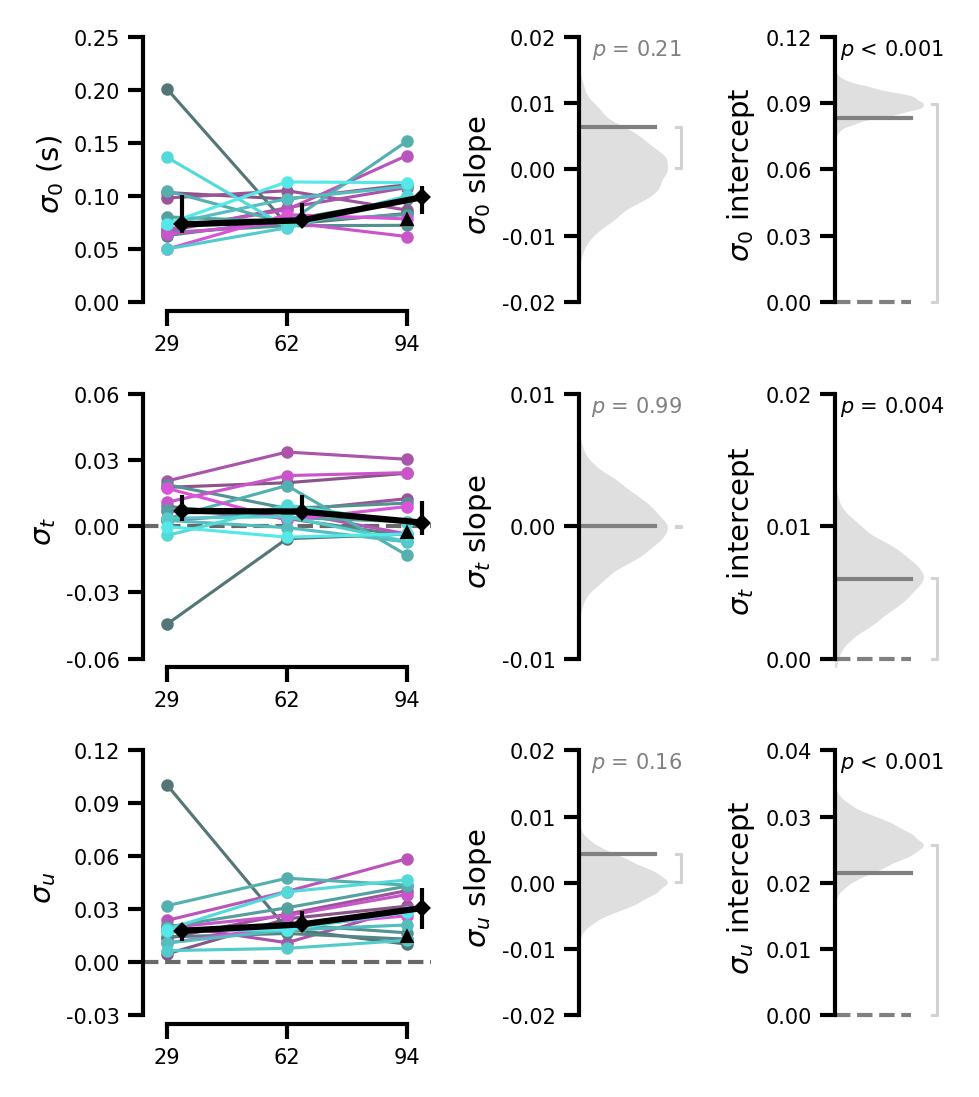

In [ ]:
def FigureS8A_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, sigma_0, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [sigma_0[animal]["60"], sigma_0[animal]["90"], sigma_0[animal]["120"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2])

    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/example_session_fit_run_duration.p", "rb"))
    ex_session = ax.plot(2, ex_sigma, color='black', marker='^', zorder=10, markersize=2, linewidth=0)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(0, .25)
    ax.set_yticks([0, .05, .1, .15, .2, .25])
    ax.set_ylabel(r'$\sigma_0$' + ' (s)')


    plotmedian(sigma_0, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)

        
def FigureS8A_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, _, sigma_t, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [sigma_t[animal]["60"], sigma_t[animal]["90"], sigma_t[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2])
        
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/example_session_fit_run_duration.p", "rb"))
    ax.plot(2, ex_sigma_t, color='black', marker='^', zorder=10, markersize=2, linewidth=0)
    
    
    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-0.06, .06)
    ax.set_yticks([-.06, -.03, 0, .03, 0.06])
    ax.set_ylabel(r'$\sigma_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_t, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def FigureS8A_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, _, _, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [sigma_u[animal]["60"], sigma_u[animal]["90"], sigma_u[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2])
        
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/example_session_fit_run_duration.p", "rb"))
    ax.plot(2, ex_sigma_u, color='black', marker='^', zorder=10, markersize=2, linewidth=0)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-.03, .12)
    ax.set_yticks([-.03, 0, .03, .06, .09, .12])
    ax.set_ylabel(r'$\sigma_u$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_u, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')


def FigureS8A_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, sigma_0, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    regression_permutation(sigma_0, dist_or_tm='dist', varname=r'$\sigma_0$', 
                        ax_slope=ax_slope, yticks_slope=[-0.02, -0.01, 0, 0.01, 0.02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .03, 0.06, .09, .12])

def FigureS8A_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, _, sigma_t, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(sigma_t, dist_or_tm='dist', varname=r'$\sigma_t$', 
                        ax_slope=ax_slope, yticks_slope=[-.01, 0, .01], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .01, .02])

def FigureS8A_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, _, _, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(sigma_u, dist_or_tm='dist', varname=r'$\sigma_u$',
                        ax_slope=ax_slope, yticks_slope=[-0.02, -0.01, 0, 0.01, 0.02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, 0.01, 0.02, 0.03, 0.04])


fig, axs = plt.subplots(3, 3, figsize=(cm2inch(8), cm2inch(9)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
FigureS8A_zero(ax=axs[0, 0])
FigureS8A_t(ax=axs[1, 0])
FigureS8A_u(ax=axs[2, 0])


FigureS8A_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
FigureS8A_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
FigureS8A_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])


# S8B Effect of treadmill belt velocity on $σ_0$, $σ_t$, and $σ_u$

$\sigma_0$: p_s=0.000, p_i=0.000, obs_slope=0.008, obs_intercept=0.068
$\sigma_t$: p_s=0.543, p_i=0.000, obs_slope=0.001, obs_intercept=0.007
$\sigma_u$: p_s=0.098, p_i=0.000, obs_slope=0.002, obs_intercept=0.020


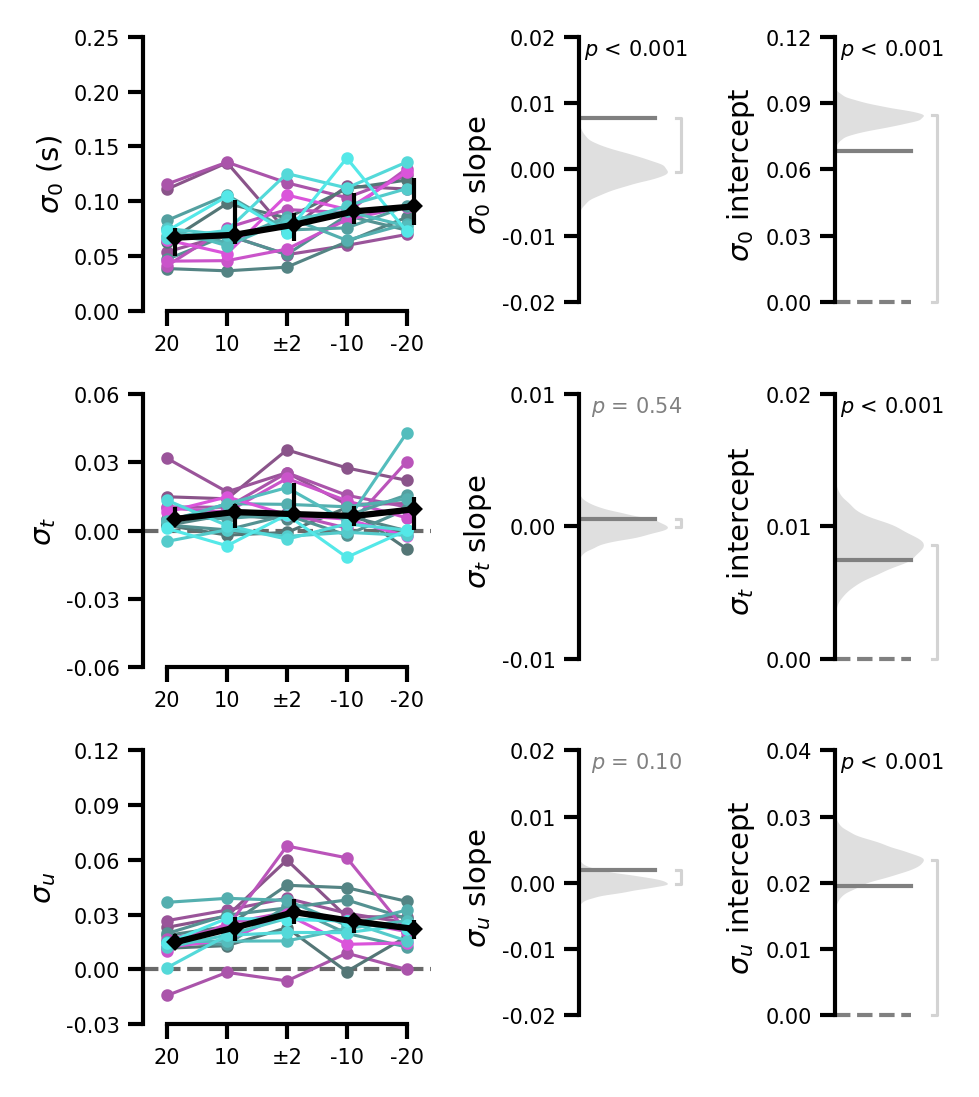

In [5]:
def FigureS8B_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, sigma_0, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [sigma_0[animal]["20"], sigma_0[animal]["10"], sigma_0[animal]["2"], sigma_0[animal]["rev10"], sigma_0[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2])
    
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(0, .25)
    ax.set_yticks([0, .05, .1, .15, .2, .25])
    ax.set_ylabel(r'$\sigma_0$' + ' (s)')
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_0, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS8B_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, _, sigma_t, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [sigma_t[animal]["20"], sigma_t[animal]["10"], sigma_t[animal]["2"], sigma_t[animal]["rev10"], sigma_t[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2])
        
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-0.06, .06)
    ax.set_yticks([-.06, -.03, 0, .03, 0.06])
    ax.set_ylabel(r'$\sigma_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_t, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS8B_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, _, _, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [sigma_u[animal]["20"], sigma_u[animal]["10"], sigma_u[animal]["2"], sigma_u[animal]["rev10"], sigma_u[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2])

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-.03, .12)
    ax.set_yticks([-.03, 0, .03, .06, .09, .12])
    ax.set_ylabel(r'$\sigma_u$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_u, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')


def FigureS8B_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, sigma_0, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    regression_permutation(sigma_0, dist_or_tm='tm', varname=r'$\sigma_0$', 
                        ax_slope=ax_slope, yticks_slope=[-0.02, -0.01, 0, 0.01, 0.02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .03, 0.06, .09, .12])

def FigureS8B_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, _, sigma_t, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(sigma_t, dist_or_tm='tm', varname=r'$\sigma_t$', 
                        ax_slope=ax_slope, yticks_slope=[-.01, 0, .01], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .01, .02])

def FigureS8B_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, _, _, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(sigma_u, dist_or_tm='tm', varname=r'$\sigma_u$',
                        ax_slope=ax_slope, yticks_slope=[-0.02, -0.01, 0, 0.01, 0.02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, 0.01, 0.02, 0.03, 0.04])

fig, axs = plt.subplots(3, 3, figsize=(cm2inch(8), cm2inch(9)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
FigureS8B_zero(ax=axs[0, 0])
FigureS8B_t(ax=axs[1, 0])
FigureS8B_u(ax=axs[2, 0])

FigureS8B_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
FigureS8B_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
FigureS8B_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])


# Figure S8: Run duration variability model parameters across action costs.

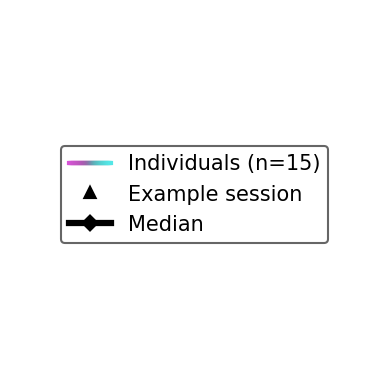

In [6]:

def dummy_legend(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    ex_session = ax.plot(2, 0, color='black', marker='^', zorder=10, markersize=2, linewidth=0, label='Example session')
    median = ax.plot([-100, -101], [-100, -101], color='k', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median', zorder=5)

    ax.axis('off')
    ax.set_xlim(10, 11)
    ax.set_ylim(10, 11)

    add_colored_intact(ax, handles=[ex_session, median],
                    labels=['Example session', 'Median'], text=f'Individuals (n={len(animalList)})', 
                    loc='center', bbox=(.5, .5))


fig, axs = plt.subplots(1, 1, figsize=(cm2inch(3), cm2inch(3)))
dummy_legend(ax=axs)

$\sigma_0$: p_s=0.212, p_i=0.000, obs_slope=0.006, obs_intercept=0.083
$\sigma_t$: p_s=0.993, p_i=0.004, obs_slope=0.000, obs_intercept=0.006
$\sigma_u$: p_s=0.162, p_i=0.000, obs_slope=0.004, obs_intercept=0.021
$\sigma_0$: p_s=0.000, p_i=0.000, obs_slope=0.008, obs_intercept=0.068
$\sigma_t$: p_s=0.543, p_i=0.000, obs_slope=0.001, obs_intercept=0.007
$\sigma_u$: p_s=0.098, p_i=0.000, obs_slope=0.002, obs_intercept=0.020


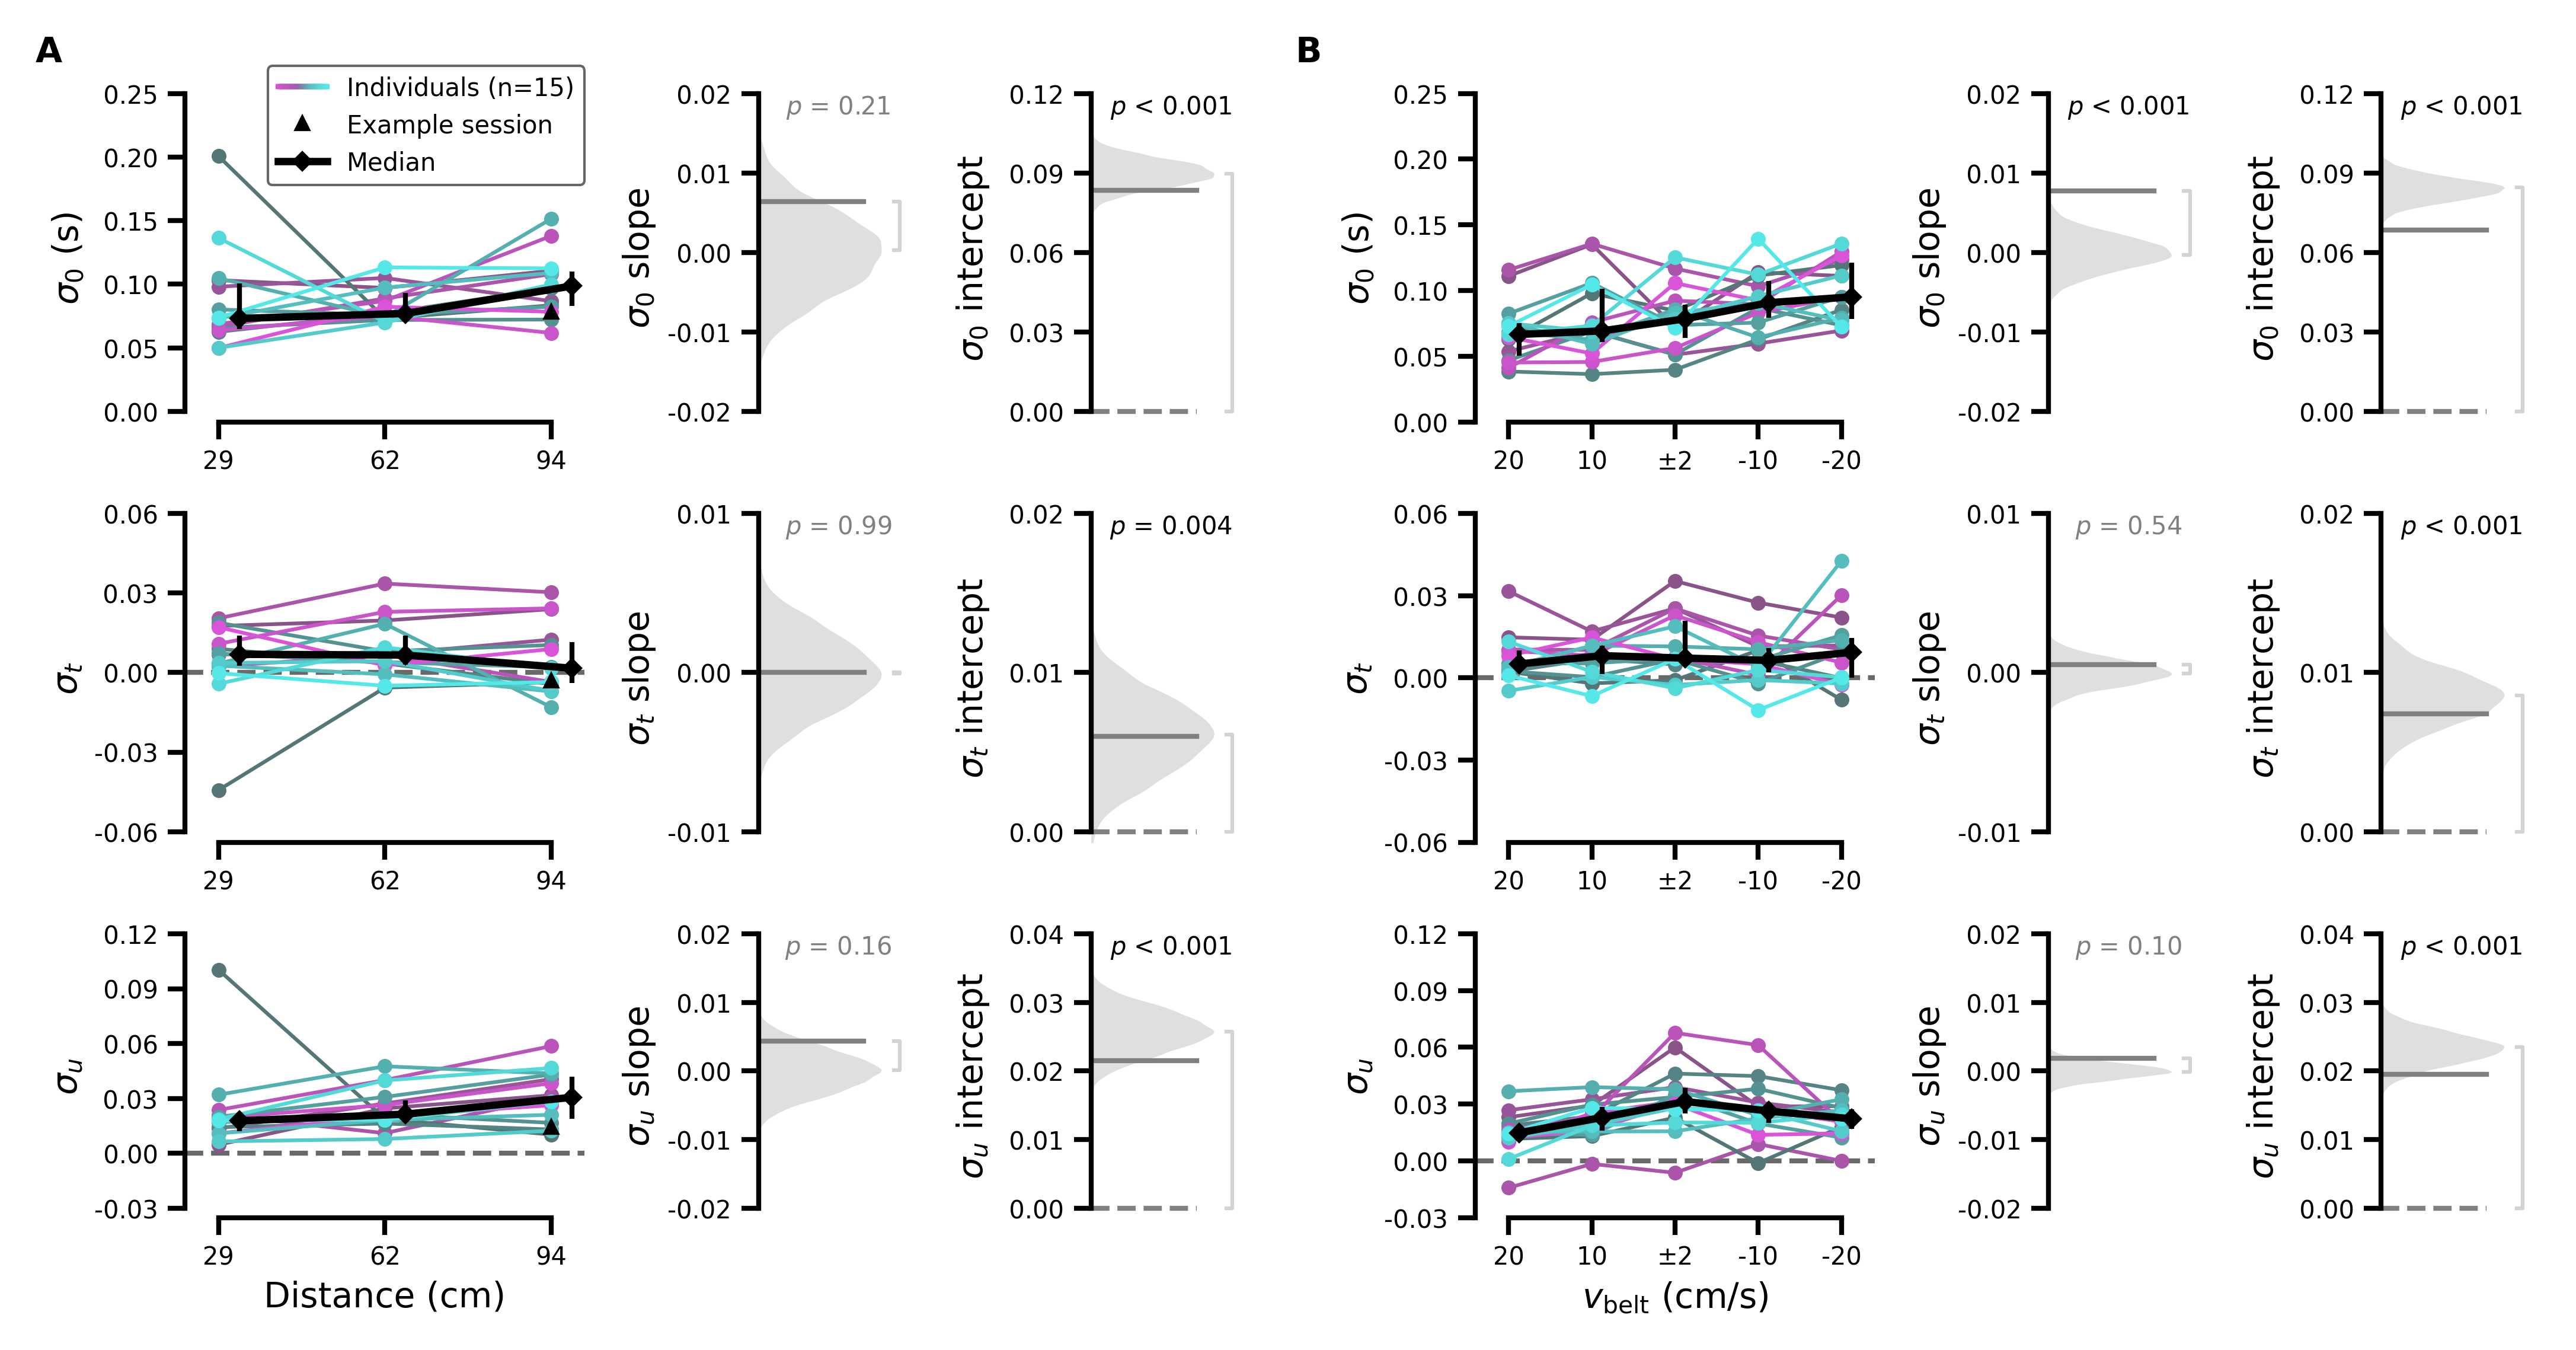

In [7]:
fig = plt.figure(figsize=(cm2inch(18), cm2inch(9)), constrained_layout=True, facecolor='w', dpi=600)

gs0 = fig.add_gridspec(3, 1, wspace=.5, hspace=.5, height_ratios=[1, 1, 1])

row1 = gs0[0].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_sigma_0_distance = plt.subplot(row1[0])
fit_sigma_0_distance_slope = plt.subplot(row1[1])
fit_sigma_0_distance_intercept = plt.subplot(row1[2])
fit_sigma_0_vbelt = plt.subplot(row1[4])
fit_sigma_0_vbelt_slope = plt.subplot(row1[5])
fit_sigma_0_vbelt_intercept = plt.subplot(row1[6])

row2 = gs0[1].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_sigma_t_distance = plt.subplot(row2[0])
fit_sigma_t_distance_slope = plt.subplot(row2[1])
fit_sigma_t_distance_intercept = plt.subplot(row2[2])
fit_sigma_t_vbelt = plt.subplot(row2[4])
fit_sigma_t_vbelt_slope = plt.subplot(row2[5])
fit_sigma_t_vbelt_intercept = plt.subplot(row2[6])

row3 = gs0[2].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_sigma_u_distance = plt.subplot(row3[0])
fir_sigma_u_distance_slope = plt.subplot(row3[1])
fit_sigma_u_distance_intercept = plt.subplot(row3[2])
fit_sigma_u_vbelt = plt.subplot(row3[4])
fit_sigma_u_vbelt_slope = plt.subplot(row3[5])
fit_sigma_u_vbelt_intercept = plt.subplot(row3[6])


FigureS8A_zero(ax=fit_sigma_0_distance)
FigureS8A_t(ax=fit_sigma_t_distance)
FigureS8A_u(ax=fit_sigma_u_distance, show_xlabel=True)

FigureS8A_zero_stats(ax_slope=fit_sigma_0_distance_slope, ax_intercept=fit_sigma_0_distance_intercept)
FigureS8A_t_stats(ax_slope=fit_sigma_t_distance_slope, ax_intercept=fit_sigma_t_distance_intercept)
FigureS8A_u_stats(ax_slope=fir_sigma_u_distance_slope, ax_intercept=fit_sigma_u_distance_intercept)

FigureS8B_zero(ax=fit_sigma_0_vbelt)
FigureS8B_t(ax=fit_sigma_t_vbelt)
FigureS8B_u(ax=fit_sigma_u_vbelt, show_xlabel=True)

FigureS8B_zero_stats(ax_slope=fit_sigma_0_vbelt_slope, ax_intercept=fit_sigma_0_vbelt_intercept)
FigureS8B_t_stats(ax_slope=fit_sigma_t_vbelt_slope, ax_intercept=fit_sigma_t_vbelt_intercept)
FigureS8B_u_stats(ax_slope=fit_sigma_u_vbelt_slope, ax_intercept=fit_sigma_u_vbelt_intercept)

axes = fig.get_axes()
for ax in axes:
    ax.yaxis.set_major_formatter('{x:>5.2f}')

legend = fig.add_axes([.15, .95, .01, .01])
dummy_legend(ax=legend)

figuresLabels = {"A":[0.00, 1.00], "B":[0.5, 1.00]}

for label, coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1], label, figure=fig, 
             weight='bold', fontsize=7, ha='left', va='bottom')


plt.savefig("./Figures_paper/Figure_S8.pdf", facecolor='w', 
                edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_S8.svg", facecolor='w', 
                edgecolor='none', bbox_inches='tight', format="svg", dpi=600)